In [1]:
# Larger CNN for the MNIST Dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [2]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
len(y_train)

60000

In [4]:
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

In [5]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [7]:
num_classes

10

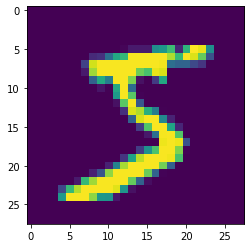

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
img = X_train[0].reshape(28, 28)
plt.imshow(img)

In [9]:
# define the larger model
def larger_model():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [11]:
# build the model
model = larger_model()

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               4

In [13]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose = 2)

Epoch 1/10
300/300 - 88s - loss: 0.3920 - accuracy: 0.8752 - val_loss: 0.0787 - val_accuracy: 0.9745
Epoch 2/10
300/300 - 36s - loss: 0.0945 - accuracy: 0.9709 - val_loss: 0.0505 - val_accuracy: 0.9833
Epoch 3/10
300/300 - 37s - loss: 0.0690 - accuracy: 0.9788 - val_loss: 0.0426 - val_accuracy: 0.9860
Epoch 4/10
300/300 - 36s - loss: 0.0575 - accuracy: 0.9818 - val_loss: 0.0379 - val_accuracy: 0.9866
Epoch 5/10
300/300 - 34s - loss: 0.0467 - accuracy: 0.9851 - val_loss: 0.0308 - val_accuracy: 0.9896
Epoch 6/10
300/300 - 31s - loss: 0.0425 - accuracy: 0.9867 - val_loss: 0.0261 - val_accuracy: 0.9910
Epoch 7/10
300/300 - 32s - loss: 0.0385 - accuracy: 0.9876 - val_loss: 0.0236 - val_accuracy: 0.9914
Epoch 8/10
300/300 - 35s - loss: 0.0346 - accuracy: 0.9887 - val_loss: 0.0241 - val_accuracy: 0.9921
Epoch 9/10
300/300 - 35s - loss: 0.0320 - accuracy: 0.9897 - val_loss: 0.0267 - val_accuracy: 0.9911
Epoch 10/10
300/300 - 32s - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0.0260 - val_accura

In [14]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Large CNN Error: 0.92%


In [ ]:
scores

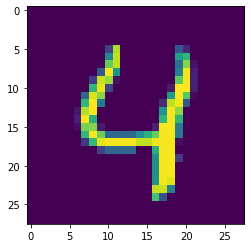

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
img = X_test[4].reshape(28, 28)
plt.imshow(img)

In [16]:
test = model.predict_classes(X_test[0:5])

C:\Users\Think\anaconda3\envs\tensorflowEnv\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [17]:
test

array([7, 2, 1, 0, 4], dtype=int64)